# Adam Trentowski - 162602 - Machine Learning
## lab_03
## Library Imports

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

## Load dataset

In [3]:
dataset = pd.read_csv('VLagun_Phys_Years3.csv')
dataset.head()

,PSU,O2,temp.,SS,DOC,TPOC,Windspeedinsitu,Depth,Years
0,3.757624,9.46,18.3,52.0,7.500,8.5650,3.5,3.3,0
1,3.504707,9.89,19.1,50.0,7.860,8.5200,0.0,3.6,0
2,3.757624,9.66,18.1,59.0,8.172,8.4915,1.0,3.4,0
3,3.107266,10.36,19.5,46.0,7.848,8.8320,0.0,2.9,0
4,2.619498,11.56,19.0,42.0,7.536,9.2400,0.0,3.0,0


## Isolation of X and Y

In [4]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

## Encoding the target variable

In [5]:
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)
label_encoder_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [6]:
print("Mapping of Label Encoded Classes:")
print(label_encoder_name_mapping, sep="\n")
print("Label Encoded Target Variable:", encoded_y, sep="\n")

Mapping of Label Encoded Classes:
{np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
Label Encoded Target Variable:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


### (0 – means a mild year, 1 – a year with storms)

## K-Fold Cross-Validation and Visualization

In [14]:
def cross_validation(model, _X, _y, _cv=5):
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(
        estimator=model,
        X=_X,
        y=_y,
        cv=_cv,
        scoring=_scoring,
        return_train_score=True
    )
    return {
        "Training Accuracy scores": results['train_accuracy'],
        "Mean Training Accuracy": results['train_accuracy'].mean() * 100,
        "Training Precision scores": results['train_precision'],
        "Mean Training Precision": results['train_precision'].mean(),
        "Training Recall scores": results['train_recall'],
        "Mean Training Recall": results['train_recall'].mean(),
        "Training F1 scores": results['train_f1'],
        "Mean Training F1 Score": results['train_f1'].mean(),
        "Validation Accuracy scores": results['test_accuracy'],
        "Mean Validation Accuracy": results['test_accuracy'].mean() * 100,
        "Validation Precision scores": results['test_precision'],
        "Mean Validation Precision": results['test_precision'].mean(),
        "Validation Recall scores": results['test_recall'],
        "Mean Validation Recall": results['test_recall'].mean(),
        "Validation F1 scores": results['test_f1'],
        "Mean Validation F1 Score": results['test_f1'].mean()
    }

In [15]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
    plt.figure(figsize=(12, 6))
    labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
    x_axis = np.arange(len(labels))
    ax = plt.gca()
    plt.ylim(0.40, 1.0)

    plt.bar(x_axis - 0.2, train_data, 0.4, color='blue', label='Training')
    plt.bar(x_axis + 0.2, val_data, 0.4, color='red', label='Validation')

    plt.title(plot_title, fontsize=30)
    plt.xticks(x_axis, labels)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

In [16]:
decision_tree_model = DecisionTreeClassifier(criterion="entropy", random_state=0)

In [17]:
decision_tree_result = cross_validation(decision_tree_model, X, encoded_y, 5)
decision_tree_result

{'Training Accuracy scores': array([1., 1., 1., 1., 1.]),
 'Mean Training Accuracy': np.float64(100.0),
 'Training Precision scores': array([1., 1., 1., 1., 1.]),
 'Mean Training Precision': np.float64(1.0),
 'Training Recall scores': array([1., 1., 1., 1., 1.]),
 'Mean Training Recall': np.float64(1.0),
 'Training F1 scores': array([1., 1., 1., 1., 1.]),
 'Mean Training F1 Score': np.float64(1.0),
 'Validation Accuracy scores': array([0.79166667, 0.79166667, 0.75      , 0.79166667, 0.83333333]),
 'Mean Validation Accuracy': np.float64(79.16666666666666),
 'Validation Precision scores': array([0.71428571, 0.875     , 0.72727273, 0.75      , 0.75      ]),
 'Mean Validation Precision': np.float64(0.7633116883116884),
 'Validation Recall scores': array([0.90909091, 0.63636364, 0.72727273, 0.81818182, 1.        ]),
 'Mean Validation Recall': np.float64(0.8181818181818181),
 'Validation F1 scores': array([0.8       , 0.73684211, 0.72727273, 0.7826087 , 0.85714286]),
 'Mean Validation F1 Sco

## Plot Accuracy Results

In [22]:
model_name = "Decision Tree"

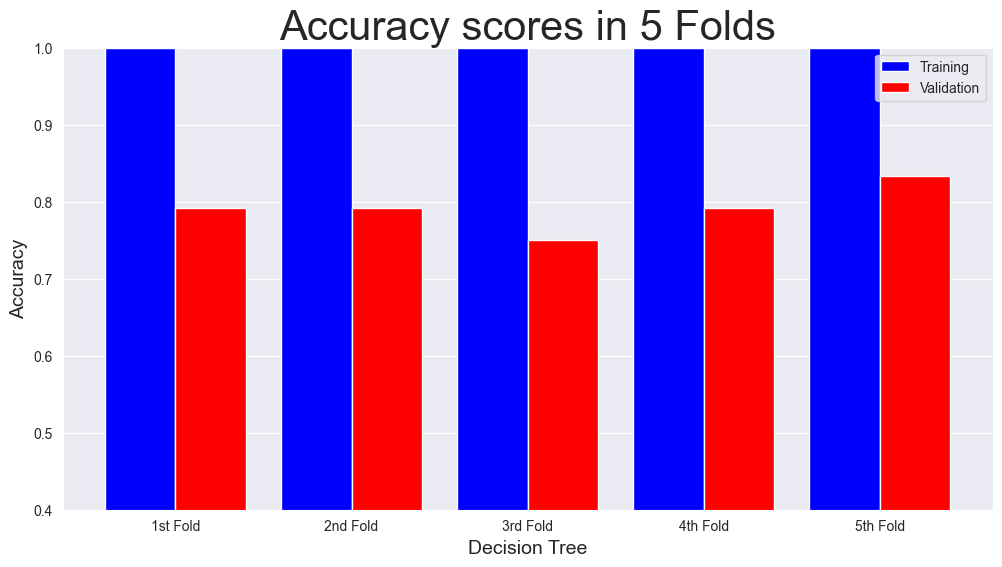

In [23]:
plot_result(model_name, 
            "Accuracy", 
            "Accuracy scores in 5 Folds",
            decision_tree_result["Training Accuracy scores"], 
            decision_tree_result["Validation Accuracy scores"])

## Plot Precision Results

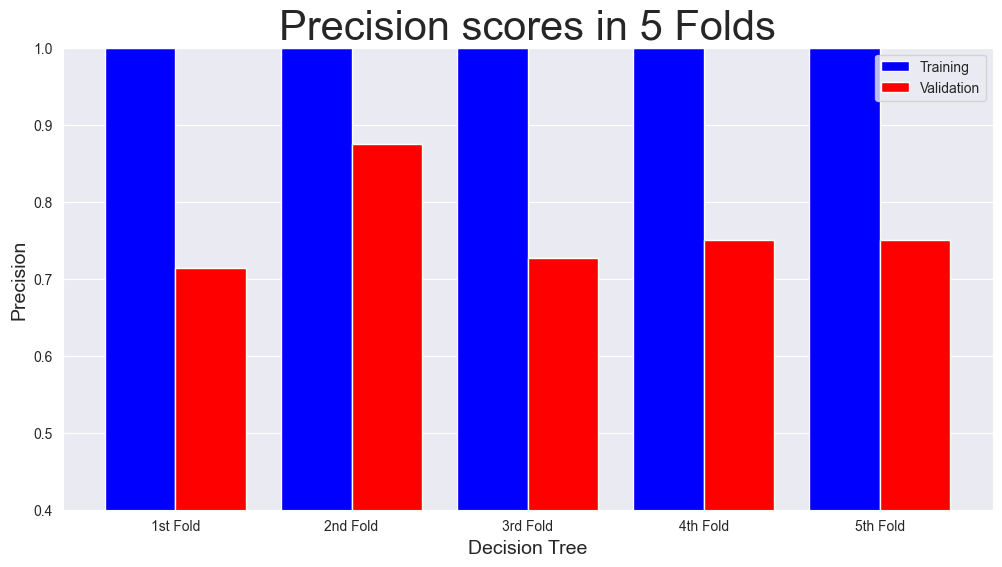

In [24]:
plot_result(model_name, 
            "Precision", 
            "Precision scores in 5 Folds",
            decision_tree_result["Training Precision scores"], 
            decision_tree_result["Validation Precision scores"])

## Plot Recall Results

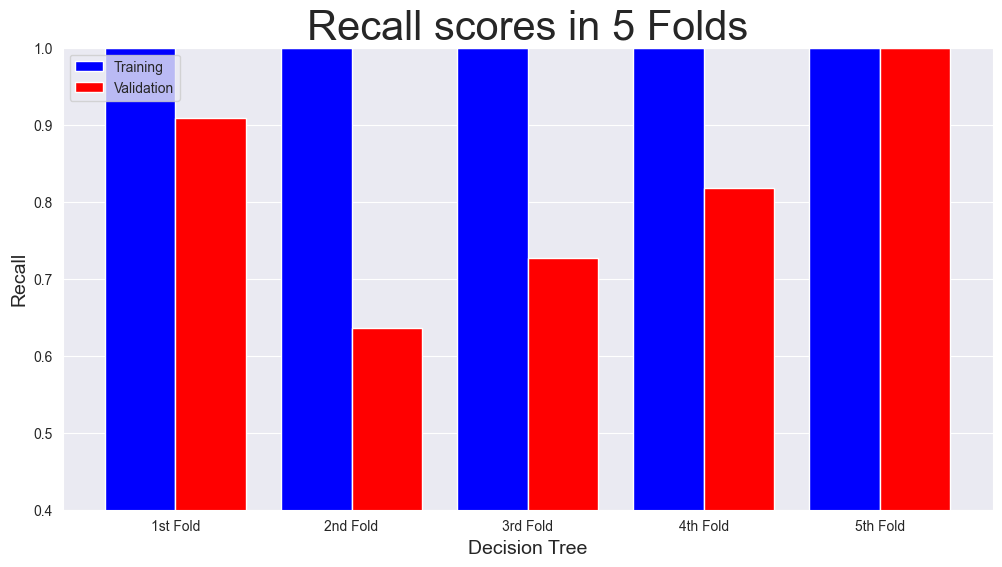

In [25]:
plot_result(model_name, 
            "Recall", 
            "Recall scores in 5 Folds",
            decision_tree_result["Training Recall scores"], 
            decision_tree_result["Validation Recall scores"])

## Plot F1-Score Results

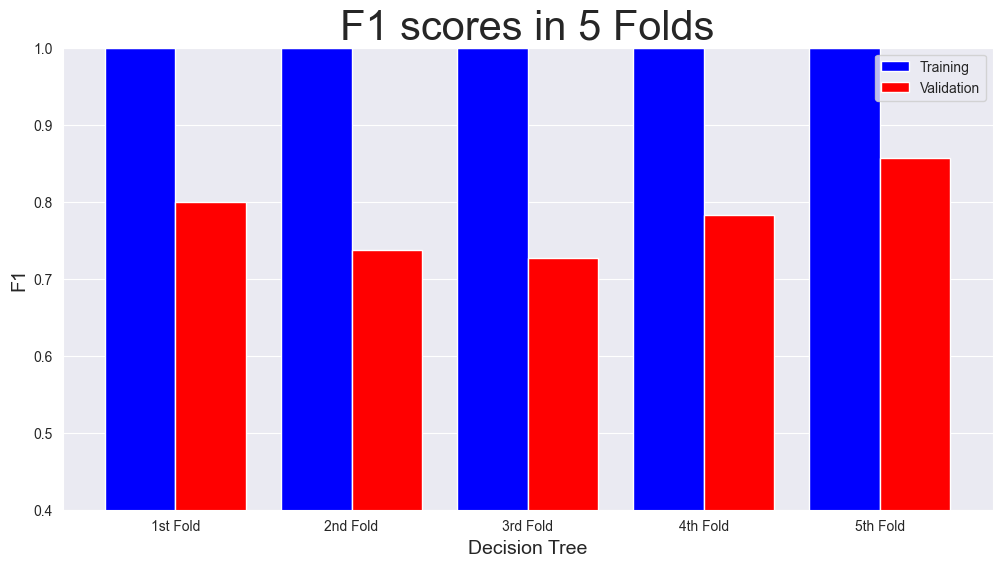

In [26]:
plot_result(model_name, 
            "F1", 
            "F1 scores in 5 Folds",
            decision_tree_result["Training F1 scores"], 
            decision_tree_result["Validation F1 scores"])